# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem definition
> How well can we predict the future sale price of bulldozers, given it's characteristics and previous examples of how much similar bulldozers have been sold for?
## 2. Data
Data is downloaded from the kaggle bluebook for Bulldozers competition:

The data for this competition is split into three parts:

* **Train.csv** is the training set, which contains data through the end of 2011.
* **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation check  https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

> **Note**: The goal for most regression evaluation metrics is to minimiza the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.
> 
## 4. Features
Kaggle provides a data dictionay detailing all of the feature of the dataset. You can view here:
https://docs.google.com/spreadsheets/d/1SFoqtKSO-78FEHh4YXhEpcmMSOXpWsDKsfDgMthj3eA/edit?usp=sharing



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import training and validation sets

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [4]:
df.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500.0,1001274,4605,121,3.0,2004,508.0,Low,12/18/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000.0,772701,1937,121,3.0,1993,11540.0,High,8/26/2004 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000.0,902002,3539,121,3.0,2001,4883.0,High,11/17/2005 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500.0,1036251,36003,121,3.0,2008,302.0,Low,8/27/2009 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000.0,1016474,3883,121,3.0,1000,20700.0,Medium,8/9/2007 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
# Vediamo quanti valori mancano e dove
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [10]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

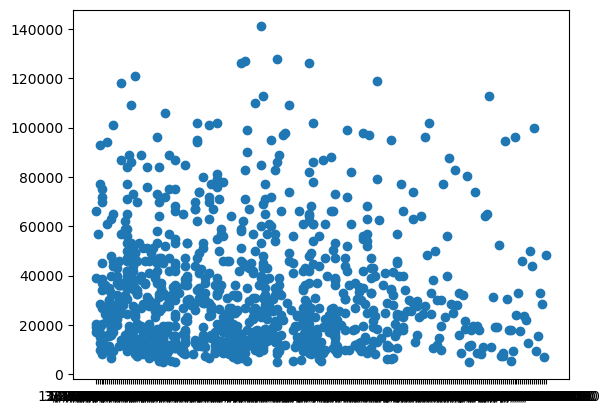

In [3]:
fig, ax = plt.subplots()

ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [23]:
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

<Axes: ylabel='Frequency'>

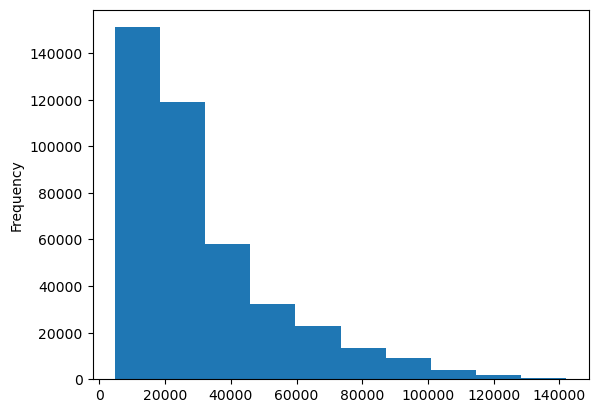

In [14]:
df.SalePrice.plot.hist()

### Parsing dates
Quando lavoriamo con dati di tempo dobbiamo fare il parsing date, e lo faremo dicendo a pandas quale delle nostre colonne ha delle date, usando il parametro `parse_date` parametro

In [4]:
# Import data again but this time parse dates

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", 
                 low_memory=False,
                 parse_dates=["saledate"]
                )

In [5]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

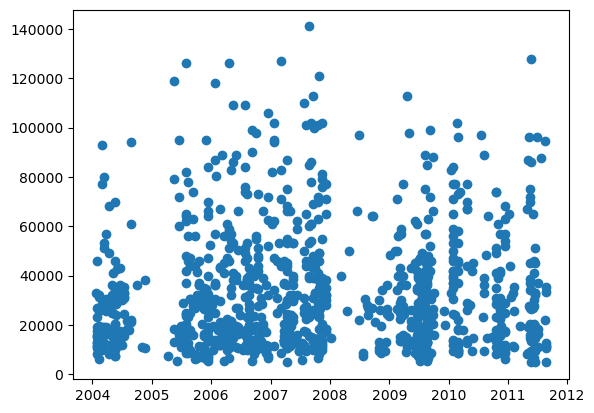

In [6]:
fig, ax = plt.subplots()

ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

Using Transpose to view all the columns

In [9]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [10]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### For Time Series Problem we can sort the DataFrane by date (saledate in this case)
When working with time series data, it's a good idea to sort it by date.

In [12]:
# Sort Dataframe in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)

df.saledate.head(20)

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
92531    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
92780    1989-01-31
238373   1989-01-31
127132   1989-01-31
115102   1989-01-31
32317    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [17]:
# Make a copy

df_tmp = df.copy()

In [18]:
df_tmp.saledate.head(20)

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
92531    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
92780    1989-01-31
238373   1989-01-31
127132   1989-01-31
115102   1989-01-31
32317    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Add datetime parameters for `saledate` column

In [23]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.day_of_week
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.day_of_year

In [24]:
df_tmp.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [25]:
# Now we've enriched out DataFrame with date time features, we can remove `saledate`
df_tmp.drop("saledate", axis=1, inplace=True)

In [27]:
# Check the values of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling
We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.

In [29]:
## Checking data
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories.

We can check the different data types compatible with pandas here:

https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html

In [32]:
pd.api.types.is_string_dtype(df_tmp["state"])

True

In [33]:
# Find the column which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [37]:
# what df.items() does, example:
random_dict = {"key": "hello",
               "key2": "world!"}

for key, value in random_dict.items():
    print(f"this is a key: {key} and ",
         f"this is a value: {value}")

this is a key: key and  this is a value: hello
this is a key: key2 and  this is a value: world!


In [38]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [39]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [40]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [41]:
df_tmp["state"].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [44]:
df_tmp["state"].cat.codes

205615    43
233186     8
142491     8
115536     8
92301      8
          ..
409901     4
405777     4
411889     4
411890     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data...

In [47]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data

In [50]:
# Export current tmp dataframe

df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv", index=False)

In [3]:
# Import Preprocessed data

df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv", low_memory=False)

df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1728883,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,WA150,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
2,1508502,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,D7F,...,None or Unspecified,Angle,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1452578,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,966C,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1403418,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31


In [52]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill missing Values
### Fill numerical missing values firts

In [4]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [5]:
df_tmp.ModelID

0          8434
1          9105
2          4138
3          3854
4          7110
          ...  
412693     4605
412694     6868
412695    17231
412696    17231
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [6]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [23]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary columns which tell us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # fill missing numeric values with mediam
            df_tmp[label] = content.fillna(content.median())
            

In [12]:
# Demonstrate how median is more robust than mean
hundreds = np.full((1000,),100)
hundreds_billion = np.append(hundreds,1000000000)

np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(np.float64(100.0),
 np.float64(999100.8991008991),
 np.float64(100.0),
 np.float64(100.0))

In [15]:
hundreds[:10]

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100])

In [21]:
hundreds_billion[-10:]

array([       100,        100,        100,        100,        100,
              100,        100,        100,        100, 1000000000])

In [24]:
# Check if there's anu null numeric values
for label, content in df_tmp.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                print(label)

In [25]:
# check to see how many examples were missing (abbiamo riempito tutti quelli che danno TRUE)
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [26]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers

In [28]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
        if not pd.api.types.is_numeric_dtype(content):
            print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [30]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], shape=(412698,), dtype=int8)

In [31]:
pd.Categorical(df_tmp["UsageBand"]).codes

array([-1, -1, -1, ..., -1, -1, -1], shape=(412698,), dtype=int8)

In [32]:
# Turn Categorical Variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add binary column to indicate wheter sample ha missing value or not
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [33]:
pd.Categorical(df_tmp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], shape=(412698,), dtype=int8)

In [35]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [36]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,True
Blade_Type_is_missing,False,True,False,True,True
Travel_Controls_is_missing,False,True,False,True,True
Differential_Type_is_missing,True,True,True,False,True


In [37]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all of data is numeric as well as out dataframe has no missing values, we should be able to build a machine learning model

In [38]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1728883,30000.0,1523610,9105,132,99.0,1986,0.0,0,4772,...,True,True,True,True,True,True,True,True,True,True
2,1508502,21000.0,1153157,4138,132,99.0,1972,0.0,0,2347,...,True,True,True,True,True,False,False,False,True,True
3,1452578,33000.0,1544443,3854,132,99.0,1974,0.0,0,1767,...,True,True,True,True,True,True,True,True,False,False
4,1403418,24000.0,1390168,7110,132,99.0,1986,0.0,0,744,...,True,True,True,True,True,True,True,True,True,True


In [39]:
len(df_tmp)

412698

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
%%time
# Istantiate a model 
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: user 8min 59s, sys: 4.62 s, total: 9min 4s
Wall time: 1min 27s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [43]:
# Score the model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875966080326709

**Question:** 
Why this metric is not reliable? 0.9875966080326709

Questo perchè abbiamo fatto il fit del modello e la valutazione dallo stesso set di dati


Nel nostro archivio dati, preso da Kaggle, ci venivano fornito anche dei csv separati in modo che:
* Train date fino alla fine del 2011
* Valid, da January 1, 2012 - April 30, 2012
* Test May 1, 2012 - November 2012

Visto che abbiamo lavorato sul csv che conteneva train e valid ed è una time siries possiamo ricrearli noi

### Splitting Data into train/validation sets

In [45]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [47]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear !=2012]

len(df_val), len(df_train) #il df_val dovrà corrispondere al numero di campio presenti nel 2012 > 11573

(11573, 401125)

In [50]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]

X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

# controlliamo che non ci siano errori

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function
Sappiamo che dobbiamo valutare il modello con $RMSLE$ ovvero il root mean squared log error, sappiamo che abbiamo a disposizione $R^2$ $MAE$ $MSE$ e $RMSE$, quindi dobbiamo creare la nostra funzione di valutazione che rispecchi la richiesta

In [51]:
# Create evaluation function (the competition uses RMSLE)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


# Create function to evaluate model on a few different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE":rmsle(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2":r2_score(y_valid, val_preds)}
    return scores

## Testing Out model on a subset (to tune the hyperparameters)

In [55]:
# This takes far too long...for experimenting
%%time
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# Fit the model
model.fit(X_train, y_train)

CPU times: user 9min 35s, sys: 4.17 s, total: 9min 39s
Wall time: 1min 25s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [56]:
show_scores(model)

{'Training MAE': 1579.374743085073,
 'Valid MAE': 6107.7007448371205,
 'Training RMSLE': np.float64(0.08425696611301287),
 'Valid RMSLE': np.float64(0.25499664901042046),
 'Training R^2': 0.9875520964645934,
 'Valid R^2': 0.8730725427128277}

In [57]:
len(X_train)

401125

In [61]:
# Change max_sample value (vogliamo ridurre i tepmi tra ogni esperimento)
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000) # invece di 401125 per ogni estimatore

In [62]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time

model.fit(X_train, y_train)

CPU times: user 17.5 s, sys: 259 ms, total: 17.7 s
Wall time: 2.79 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [63]:
show_scores(model)

{'Training MAE': 5548.995840324089,
 'Valid MAE': 7179.6961392897265,
 'Training RMSLE': np.float64(0.25737726780537257),
 'Valid RMSLE': np.float64(0.29404344200903443),
 'Training R^2': 0.8610738743845616,
 'Valid R^2': 0.8320179198265638}

### HyperParameter Tuning With RandomizedSearchCV

In [68]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters

rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,3),
          "min_samples_leaf":np.arange(1,20,4),
          "max_features": [0.5,1,"sqrt",None],
          "max_samples": [10000]}

# Istantiate RandomizedSearchCv model

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             n_iter=5, #iniziare bassi perchè potrebbe chiedere ore!
                             cv=5,
                             verbose=True)

# Fit The randomizeSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: user 56.4 s, sys: 1.01 s, total: 57.4 s
Wall time: 57.6 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt', None],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  5,  9, 13, 17]),
                                        'min_samples_split': array([ 2,  5,  8, 11, 14, 17]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [69]:
# Find the best model hyperparameters 
rs_model.best_params_

{'n_estimators': np.int64(70),
 'min_samples_split': np.int64(5),
 'min_samples_leaf': np.int64(13),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [70]:
# Evaluate the RandomizedSearch Model
show_scores(rs_model)

{'Training MAE': 6591.8753984404575,
 'Valid MAE': 7909.280323856624,
 'Training RMSLE': np.float64(0.2956601887297488),
 'Valid RMSLE': np.float64(0.3178381948572638),
 'Training R^2': 0.8083107802514388,
 'Valid R^2': 0.7945244196698652}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of `RandomizedSearchCV`
Conviene trovare dei buoni parametri anche sul numero di max sample ridotti e poi trainare di nuovo il modello con questi parametri

In [73]:
%%time

# Most ideal Hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 1min 33s, sys: 681 ms, total: 1min 33s
Wall time: 14.2 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [74]:
show_scores(ideal_model)

{'Training MAE': 2956.488700011005,
 'Valid MAE': 5957.457704159022,
 'Training RMSLE': np.float64(0.14448478225577732),
 'Valid RMSLE': np.float64(0.24544663828024385),
 'Training R^2': 0.9587936671021189,
 'Valid R^2': 0.8820814857765893}

## Make predictions on test data
importiamo il csv che contiene i dati su cui testare

In [75]:
# Import the test data
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [76]:
# Make predictions on the test dataset
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


In [77]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [78]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [79]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [81]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [85]:
def preprocess_data(df):
    """
    Performs transformation on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.day_of_week
    df["saleDayOfYear"] = df.saledate.dt.day_of_year

    df.drop("saledate", axis=1, inplace=True)

    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary columns which tell us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # fill missing numeric values with mediam
                df[label] = content.fillna(content.median())


    # Fill categorical missing data and turned categories into numbers
    
        if not pd.api.types.is_numeric_dtype(content):
            # add binary column to indicate wheter sample ha missing value or not
            df[label+"_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add +1
            df[label] = pd.Categorical(content).codes+1
    
    
    return df

In [86]:
# Process test Data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [88]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1728883,1523610,9105,132,99.0,1986,0.0,0,4772,1852,...,True,True,True,True,True,True,True,True,True,True
2,1508502,1153157,4138,132,99.0,1972,0.0,0,2347,713,...,True,True,True,True,True,False,False,False,True,True
3,1452578,1544443,3854,132,99.0,1974,0.0,0,1767,535,...,True,True,True,True,True,True,True,True,False,False
4,1403418,1390168,7110,132,99.0,1986,0.0,0,744,245,...,True,True,True,True,True,True,True,True,True,True


In [89]:
# We can find how the columns differ using sets

set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [90]:
# Manually adjust df_test to have auctioneerID_is_missing column

df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [94]:
df_test = df_test[X_train.columns]  # Reordina le colonne

In [95]:
assert list(df_test.columns) == list(X_train.columns), "Le colonne non sono ordinate correttamente!"

Finally our test dataframe has the same features as out training dataframe, we can make predictions!

In [96]:
# Make prediction on the test data

test_preds = ideal_model.predict(df_test)

In [97]:
len(test_preds)

12457

In [98]:
test_preds

array([18407.76877107, 17676.91665953, 47666.68478065, ...,
       13626.06566752, 16642.22103426, 27088.57641861], shape=(12457,))

We've made some predictions but they're not in the same format Kaggle is asking for:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

```
SalesID,SalePrice
1222837,36205
3044012,74570
1222841,31910.50
...
```

In [99]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,18407.768771
1,1227844,17676.916660
2,1227847,47666.684781
3,1227848,66452.051240
4,1227863,53670.309859
...,...,...
12452,6643171,37710.915028
12453,6643173,11183.823566
12454,6643184,13626.065668
12455,6643186,16642.221034


In [100]:
# Export Prediction Data
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions_mio.csv", index=False)

### Feature Importance
Feature importance seeks to figure out which different attributes of the data were most importance when it come to predicting the **target variable** (salePrice)

In [105]:
# Find feature importance of our best model # avremo un valore per ogni colonna
ideal_model.feature_importances_ , len(ideal_model.feature_importances_)

(array([3.15414823e-02, 1.99479809e-02, 4.54712559e-02, 1.90514307e-03,
        3.40436007e-03, 2.03055338e-01, 3.20937511e-03, 9.80203151e-04,
        4.03804074e-02, 4.09729014e-02, 6.07614597e-02, 4.53352387e-03,
        1.65881480e-02, 1.56632161e-01, 4.51592711e-02, 5.92951020e-03,
        2.17647288e-03, 4.89432486e-03, 3.33540585e-03, 6.05718935e-02,
        5.18390347e-04, 5.14462344e-05, 8.33786888e-04, 1.98674292e-04,
        1.01490464e-03, 2.41532133e-05, 6.14887534e-03, 8.96349014e-03,
        2.67536372e-03, 1.67263555e-04, 5.80998016e-03, 3.68398035e-03,
        4.56685713e-03, 2.99838744e-03, 3.00346844e-04, 4.22237672e-03,
        8.83925334e-04, 1.85417888e-02, 7.58409741e-04, 2.36577120e-03,
        9.38522565e-04, 8.50062978e-04, 2.53147871e-03, 5.92189591e-04,
        5.23013441e-04, 3.64473747e-04, 3.90509324e-04, 1.60955258e-03,
        9.86169971e-04, 2.37251098e-04, 3.03409289e-04, 7.37648620e-02,
        3.77698559e-03, 5.71902807e-03, 2.90512974e-03, 9.830783

In [108]:
# Helper function for plotting Feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features":columns,
                       "features_importances": importances})
          .sort_values("features_importances", ascending=False)
          .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["features_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

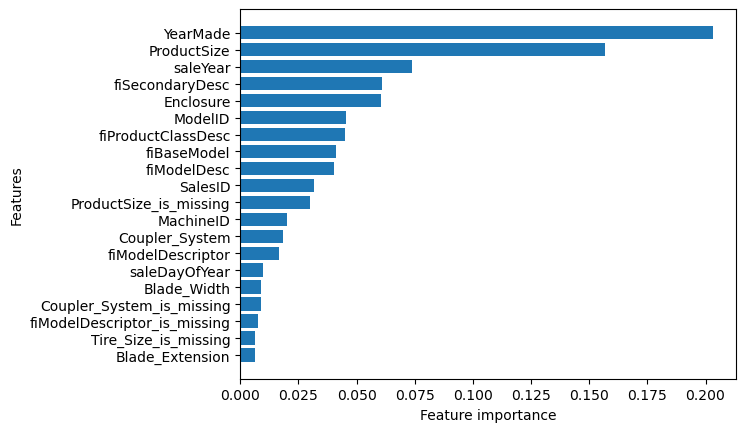

In [109]:
plot_features(X_train.columns, ideal_model.feature_importances_)

* Feature con importanza alta 🔥 → Sono quelle che il modello ha usato di più per fare predizioni.
* Feature con importanza bassa ❄️ → Probabilmente non influenzano molto l’output e potresti valutarne la rimozione per ridurre la complessità.

### Capire la feature importance in un modello di machine learning è utile per diversi motivi, tra cui:

🔍 1. Interpretabilità del Modello
* Ci aiuta a capire quali variabili influenzano maggiormente la predizione, rendendo il modello più interpretabile.
* Se il modello viene usato in ambiti critici (sanità, finanza, ecc.), sapere quali fattori determinano le decisioni è fondamentale.

🎯 2. Selezione delle Feature (Feature Selection)
* Se alcune feature hanno importanza molto bassa, potrei rimuoverle per ridurre la dimensionalità dei dati, migliorando efficienza e riducendo overfitting.
* Mi permette di identificare feature irrilevanti o ridondanti.

⚡ 3. Debug e Affidabilità del Modello
* Se una feature ha un’importanza molto alta inaspettatamente, potrebbe indicare un data leakage o un problema nei dati.
* Se una feature che mi aspettavi importante ha importanza bassa, potrei averla codificata male o trattata in modo errato.

📈 4. Ottimizzazione delle Performance
* Riducendo il numero di feature non necessarie, posso migliorare la velocità di addestramento e inferenza del modello.
* Mi permette di concentrarmi sulle variabili più influenti per ottimizzare il dataset.

🔬 5. Generazione di Nuove Feature
* Capire quali variabili sono importanti può suggerirmi nuovi modi di combinare feature per estrarre informazioni più utili.
